# BU5241 Non-HDB Price Analysis #

In [2]:
# BU5241 Non-HDB Price Analysis 

# Things I will need for the API

access_key = "e2e32d97-81f1-4e6f-9fe7-47f95c0ff905"

# token = "dfeTx7Sarf@c432KWg-7eBwaneN4e5A5f9VS4g6jy95p9R-Rf4kh116mYh5U-TDNfJqea6ec1s-WffTa73g4p-9e9s4Ap794TK6G"


In [3]:
# Importing necessary packages 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from ura_api import ura_api


ura = ura_api.ura_api(access_key)

In [4]:
# Store the resulting json file in dataframe (currently in list format)

df_dict = ura.private_residential_property_transactions()

In [ ]:
# for i in df_dict:
#     print(i)


In [6]:
df = pd.DataFrame.from_dict(df_dict)


df

,street,x,project,y,transaction,marketSegment
0,ZEHNDER ROAD,22734.9253,LANDED HOUSING DEVELOPMENT,29502.42071,"[{'area': '524.3', 'floorRange': '-', 'noOfUni...",RCR
1,NEO PEE TECK LANE,20914.1988965525,LANDED HOUSING DEVELOPMENT,30589.1070785135,"[{'area': '159.3', 'floorRange': '-', 'noOfUni...",RCR
2,COVE DRIVE,28382.47067,TURQUOISE,25008.33592,"[{'area': '226', 'floorRange': '01-05', 'noOfU...",CCR
3,BUKIT TERESA ROAD,27054.52601,LANDED HOUSING DEVELOPMENT,28712.63181,"[{'area': '435.2', 'floorRange': '-', 'noOfUni...",RCR
4,ALEXANDRA VIEW,26204.50079,ARTRA,30270.56219,"[{'area': '104', 'floorRange': '21-25', 'noOfU...",RCR
...,...,...,...,...,...,...
288,COVE GROVE,28366.75045,LANDED HOUSING DEVELOPMENT,24714.72787,"[{'area': '904.9', 'floorRange': '-', 'noOfUni...",CCR
289,ALEXANDRA VIEW,26074.4211,THE METROPOLITAN CONDOMINIUM,30319.95369,"[{'area': '127', 'floorRange': '26-30', 'noOfU...",RCR
290,WESTRIDGE WALK,23178.2986,LANDED HOUSING DEVELOPMENT,28916.22014,"[{'area': '225.1', 'floorRange': '-', 'noOfUni...",RCR
291,FABER HEIGHTS,19547.85969,FABER CREST,33943.45546,"[{'area': '96', 'floorRange': '01-05', 'noOfUn...",OCR


In [7]:
# Make every transaction into a single record

df = df.explode('transaction')

In [8]:
# Sanity Check 
df

,street,x,project,y,transaction,marketSegment
0,ZEHNDER ROAD,22734.9253,LANDED HOUSING DEVELOPMENT,29502.42071,"{'area': '524.3', 'floorRange': '-', 'noOfUnit...",RCR
0,ZEHNDER ROAD,22734.9253,LANDED HOUSING DEVELOPMENT,29502.42071,"{'area': '308', 'floorRange': '-', 'noOfUnits'...",RCR
0,ZEHNDER ROAD,22734.9253,LANDED HOUSING DEVELOPMENT,29502.42071,"{'area': '314', 'floorRange': '-', 'noOfUnits'...",RCR
0,ZEHNDER ROAD,22734.9253,LANDED HOUSING DEVELOPMENT,29502.42071,"{'area': '308', 'floorRange': '-', 'noOfUnits'...",RCR
1,NEO PEE TECK LANE,20914.1988965525,LANDED HOUSING DEVELOPMENT,30589.1070785135,"{'area': '159.3', 'floorRange': '-', 'noOfUnit...",RCR
...,...,...,...,...,...,...
292,KIM TIAN ROAD,27603.58585,HIGHLINE RESIDENCES,29605.25187,"{'area': '85', 'floorRange': '31-35', 'noOfUni...",RCR
292,KIM TIAN ROAD,27603.58585,HIGHLINE RESIDENCES,29605.25187,"{'area': '62', 'floorRange': '16-20', 'noOfUni...",RCR
292,KIM TIAN ROAD,27603.58585,HIGHLINE RESIDENCES,29605.25187,"{'area': '47', 'floorRange': '21-25', 'noOfUni...",RCR
292,KIM TIAN ROAD,27603.58585,HIGHLINE RESIDENCES,29605.25187,"{'area': '85', 'floorRange': '11-15', 'noOfUni...",RCR


In [9]:
# Coerce all the details of transactions into a separate dataframe

temp_df = pd.DataFrame()

for i in range(0, len(df)):
    temp_df = pd.concat([temp_df,pd.DataFrame.from_records([df.iloc[i]['transaction']])])



In [10]:
# Drop the original transaction column

df = df.drop('transaction', axis = 1)

# Reorder the dataframe for neatness 

cols = df.columns.tolist()

cols = ['street','x','y','project','marketSegment']

df = df[cols]

df

,street,x,y,project,marketSegment
0,ZEHNDER ROAD,22734.9253,29502.42071,LANDED HOUSING DEVELOPMENT,RCR
0,ZEHNDER ROAD,22734.9253,29502.42071,LANDED HOUSING DEVELOPMENT,RCR
0,ZEHNDER ROAD,22734.9253,29502.42071,LANDED HOUSING DEVELOPMENT,RCR
0,ZEHNDER ROAD,22734.9253,29502.42071,LANDED HOUSING DEVELOPMENT,RCR
1,NEO PEE TECK LANE,20914.1988965525,30589.1070785135,LANDED HOUSING DEVELOPMENT,RCR
...,...,...,...,...,...
292,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR
292,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR
292,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR
292,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR


In [11]:
# "left join" the 2 dataframes together 

df = pd.concat([df.reset_index(drop=True),temp_df.reset_index(drop=True)], axis=1)

df

,street,x,y,project,marketSegment,area,floorRange,noOfUnits,contractDate,typeOfSale,price,propertyType,district,typeOfArea,tenure,nettPrice
0,ZEHNDER ROAD,22734.9253,29502.42071,LANDED HOUSING DEVELOPMENT,RCR,524.3,-,1,0220,3,5500000,Semi-detached,05,Land,Freehold,NaN
1,ZEHNDER ROAD,22734.9253,29502.42071,LANDED HOUSING DEVELOPMENT,RCR,308,-,1,0918,3,5000000,Semi-detached,05,Land,Freehold,NaN
2,ZEHNDER ROAD,22734.9253,29502.42071,LANDED HOUSING DEVELOPMENT,RCR,314,-,1,0618,3,4750000,Semi-detached,05,Land,Freehold,NaN
3,ZEHNDER ROAD,22734.9253,29502.42071,LANDED HOUSING DEVELOPMENT,RCR,308,-,1,0921,3,5200000,Semi-detached,05,Land,Freehold,NaN
4,NEO PEE TECK LANE,20914.1988965525,30589.1070785135,LANDED HOUSING DEVELOPMENT,RCR,159.3,-,1,0320,3,2630000,Terrace,05,Land,Freehold,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR,85,31-35,1,0422,3,1988000,Condominium,03,Strata,99 yrs lease commencing from 2013,NaN
23656,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR,62,16-20,1,0422,3,1500000,Condominium,03,Strata,99 yrs lease commencing from 2013,NaN
23657,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR,47,21-25,1,0622,3,1150000,Condominium,03,Strata,99 yrs lease commencing from 2013,NaN
23658,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR,85,11-15,1,0422,3,1960000,Condominium,03,Strata,99 yrs lease commencing from 2013,NaN


## Now that we have done the brunt of data-preprocessing, we can do some preliminary data-cleaning (mainly conversion of data types) ##

[API Documentation](https://www.ura.gov.sg/maps/api/)

In [12]:
# Checking for any error in join statement 

print(df['nettPrice'].unique())

# Appears to be none, totally by random chance that all the records we see in dataframe preview have null nettPrice. To avoid errors during data conversion, I will just fill NaN = 0

df['nettPrice'] = df['nettPrice'].fillna(0)

[nan '1454000' '1567520' '2847680' '2644505' '2667185' '1286400' '1387400'
 '1842700' '1463100' '2758200' '1492300' '2180400' '1782600' '1310700'
 '2030400' '2008400' '1282600' '1266600' '1972600' '1482400' '1298500'
 '1244600' '2179400' '1302300' '2500100' '3438400' '2808400' '1318300'
 '2462100' '1354000' '1350200' '1254400' '1262000' '1592100' '1367700'
 '1422400' '2124600' '1342600' '1306100' '2080600' '1314500' '1274200'
 '1242300' '1829000' '1854000' '1334200' '1926300' '1347200' '1908000'
 '2039500' '1385200' '1224000' '2848600' '1872300' '1412100' '1344800'
 '1322400' '2326200' '1499300' '1370000' '2281792' '1536208' '2319180'
 '1402600' '1489200' '2360100' '2517700' '1530400' '1560600' '1366600'
 '1375200' '1945500' '2006800' '1453500' '1334000' '2123400' '2002688'
 '2102800' '1573700' '1521200' '2224300' '2002200' '1673100' '2154700'
 '2067600' '1510100' '2129200' '1509300' '3346700' '5440880' '3057112'
 '1632000' '1674000' '1790000' '1537000' '1630000' '2918335' '2418000'
 '

In [13]:
df.dtypes

# Since they are all objects, may need to force into other datatypes for better analysis 

street           object
x                object
y                object
project          object
marketSegment    object
area             object
floorRange       object
noOfUnits        object
contractDate     object
typeOfSale       object
price            object
propertyType     object
district         object
typeOfArea       object
tenure           object
nettPrice        object
dtype: object

In [14]:
# Convert street, project, marketSegment, floorRange, propertyType, typeOfArea, tenure to string 
df['street'] = df['street'].astype("string")
df['project'] = df['project'].astype("string")
df['marketSegment'] = df['marketSegment'].astype("string")
df['floorRange'] = df['floorRange'].astype("string")
df['propertyType'] = df['propertyType'].astype("string")
df['typeOfArea'] = df['typeOfArea'].astype("string")
df['tenure'] = df['tenure'].astype("string")

# Convert area to float
df['area'] = df['area'].astype("float")


# Convert noOfUnits, price, district, nettPrice to int
df['noOfUnits'] = df['noOfUnits'].astype("int")
df['price'] = df['price'].astype("int")
df['district'] = df['district'].astype("int")
df['nettPrice'] = df['nettPrice'].astype("int")

df['typeOfSale'] = df['typeOfSale'].astype("int")

# I will leave x and y alone since they are technically geospatial data, which is on a separate tier of analysis 

In [15]:
# Sanity Check 
df.dtypes


street            string
x                 object
y                 object
project           string
marketSegment     string
area             float64
floorRange        string
noOfUnits          int64
contractDate      object
typeOfSale         int64
price              int64
propertyType      string
district           int64
typeOfArea        string
tenure            string
nettPrice          int64
dtype: object

In [16]:
# The tricky part is dealing with the date types - contractDate and 

# First step is to transform the column into a string to convert to date 

df['contractDate'] = df['contractDate'].astype('string')

# Now that everything has been changed to a string, we need to do some data_processing before we can convert it to datetime 

import datetime

date_converted = []

for index, rows in df.iterrows():
    year = "20" + rows['contractDate'][2:4]
    month = rows['contractDate'][0:2]
    final_string = year + "-" + month
    date_converted.append(final_string) 

df['contractDate'] = date_converted

df['contractDate'] = pd.to_datetime(df['contractDate'])

df


,street,x,y,project,marketSegment,area,floorRange,noOfUnits,contractDate,typeOfSale,price,propertyType,district,typeOfArea,tenure,nettPrice
0,ZEHNDER ROAD,22734.9253,29502.42071,LANDED HOUSING DEVELOPMENT,RCR,524.3,-,1,2020-02-01,3,5500000,Semi-detached,5,Land,Freehold,0
1,ZEHNDER ROAD,22734.9253,29502.42071,LANDED HOUSING DEVELOPMENT,RCR,308.0,-,1,2018-09-01,3,5000000,Semi-detached,5,Land,Freehold,0
2,ZEHNDER ROAD,22734.9253,29502.42071,LANDED HOUSING DEVELOPMENT,RCR,314.0,-,1,2018-06-01,3,4750000,Semi-detached,5,Land,Freehold,0
3,ZEHNDER ROAD,22734.9253,29502.42071,LANDED HOUSING DEVELOPMENT,RCR,308.0,-,1,2021-09-01,3,5200000,Semi-detached,5,Land,Freehold,0
4,NEO PEE TECK LANE,20914.1988965525,30589.1070785135,LANDED HOUSING DEVELOPMENT,RCR,159.3,-,1,2020-03-01,3,2630000,Terrace,5,Land,Freehold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR,85.0,31-35,1,2022-04-01,3,1988000,Condominium,3,Strata,99 yrs lease commencing from 2013,0
23656,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR,62.0,16-20,1,2022-04-01,3,1500000,Condominium,3,Strata,99 yrs lease commencing from 2013,0
23657,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR,47.0,21-25,1,2022-06-01,3,1150000,Condominium,3,Strata,99 yrs lease commencing from 2013,0
23658,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR,85.0,11-15,1,2022-04-01,3,1960000,Condominium,3,Strata,99 yrs lease commencing from 2013,0


In [17]:
# Sanity Check
df.dtypes

street                   string
x                        object
y                        object
project                  string
marketSegment            string
area                    float64
floorRange               string
noOfUnits                 int64
contractDate     datetime64[ns]
typeOfSale                int64
price                     int64
propertyType             string
district                  int64
typeOfArea               string
tenure                   string
nettPrice                 int64
dtype: object

In [18]:
df

,street,x,y,project,marketSegment,area,floorRange,noOfUnits,contractDate,typeOfSale,price,propertyType,district,typeOfArea,tenure,nettPrice
0,ZEHNDER ROAD,22734.9253,29502.42071,LANDED HOUSING DEVELOPMENT,RCR,524.3,-,1,2020-02-01,3,5500000,Semi-detached,5,Land,Freehold,0
1,ZEHNDER ROAD,22734.9253,29502.42071,LANDED HOUSING DEVELOPMENT,RCR,308.0,-,1,2018-09-01,3,5000000,Semi-detached,5,Land,Freehold,0
2,ZEHNDER ROAD,22734.9253,29502.42071,LANDED HOUSING DEVELOPMENT,RCR,314.0,-,1,2018-06-01,3,4750000,Semi-detached,5,Land,Freehold,0
3,ZEHNDER ROAD,22734.9253,29502.42071,LANDED HOUSING DEVELOPMENT,RCR,308.0,-,1,2021-09-01,3,5200000,Semi-detached,5,Land,Freehold,0
4,NEO PEE TECK LANE,20914.1988965525,30589.1070785135,LANDED HOUSING DEVELOPMENT,RCR,159.3,-,1,2020-03-01,3,2630000,Terrace,5,Land,Freehold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR,85.0,31-35,1,2022-04-01,3,1988000,Condominium,3,Strata,99 yrs lease commencing from 2013,0
23656,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR,62.0,16-20,1,2022-04-01,3,1500000,Condominium,3,Strata,99 yrs lease commencing from 2013,0
23657,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR,47.0,21-25,1,2022-06-01,3,1150000,Condominium,3,Strata,99 yrs lease commencing from 2013,0
23658,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR,85.0,11-15,1,2022-04-01,3,1960000,Condominium,3,Strata,99 yrs lease commencing from 2013,0


### Adjusting for Housing CPI 

In [19]:
# import pandas as pd
# # Just manually creating series of cpi values based on 2019 as baseline
# year = [2018, 2019, 2020, 2021, 2022, 2023]
# cpi = [100.951, 100.000, 100.392, 101.841, 106.158 , 106.158]

# cpi_series = pd.Series(cpi, index=year)

In [20]:
# cpi_series

In [21]:
# df['year'] = df['contractDate'].dt.strftime('%Y') #Use pandas series dt to extract Year
# df['year']=pd.to_numeric(df.year)
# df=pd.merge(df,cpi_series,on=['year','year'])
# df.head(10)

In [22]:
#Adjusting for inflation, directly overwriting price column with the results
# df['price']=df.price/df.cpi

## Now that we have a dataframe with values that we can work with, we can do some basic plotting. ##

### Median Private Property Prices against Time ###

<Axes: title={'center': 'Median Private Property Prices from 2018-2023'}, xlabel='contractDate'>

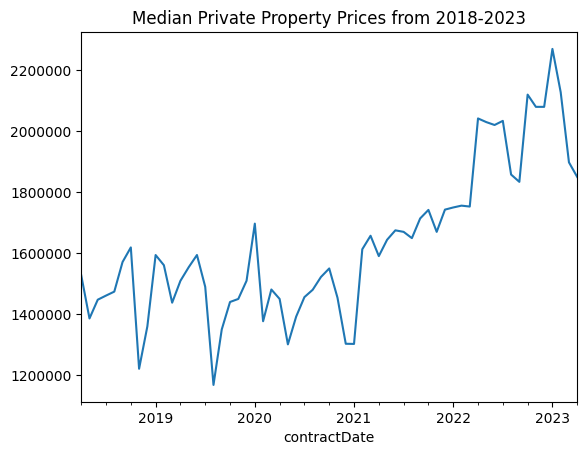

In [23]:
# Now we can do some plotting 

# Basic Time series of average price against contract date 

contract_grouped = df.groupby('contractDate')

# I did median over here because mean can be influenced by ridiculous sales or months with low sales

averaged = contract_grouped.price.median()

plt.ticklabel_format(style='plain') # preventing scientific notation
averaged.plot(title = 'Median Private Property Prices from 2018-2023')


# High variance in prices, but i think we observe a general upward trend overall for private housing. 


In [24]:
averaged

contractDate
2018-04-01    1527500.0
2018-05-01    1386000.0
2018-06-01    1447500.0
2018-07-01    1461000.0
2018-08-01    1474000.0
                ...    
2022-12-01    2080000.0
2023-01-01    2270000.0
2023-02-01    2128000.0
2023-03-01    1898000.0
2023-04-01    1850000.0
Name: price, Length: 61, dtype: float64

### Median Private Property Houses against Time by Type of House (Condominium, Terrace, Semi-detached) ###

In general, what we observe is that there has been an increase in property prices from 2020 onwards

#### Note: There are other types of houses in the dataset as well, such as Strata Detached, Strata Semi-detached, Executive Condominium, but for the sake of simplicity I will narrow down to these 3 sub-groups ####

<Axes: title={'center': 'Median Condominium Property Prices'}, xlabel='contractDate'>

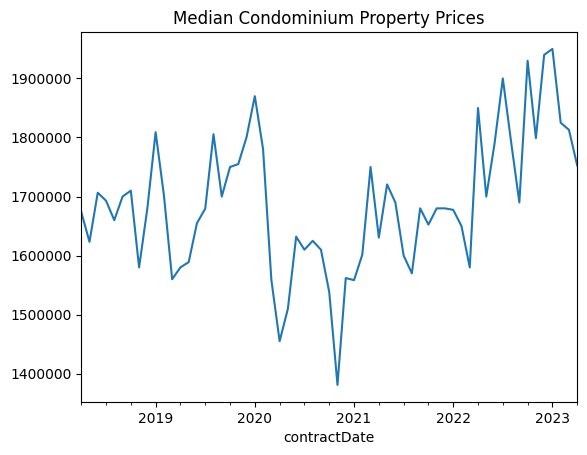

In [25]:
# Condominium
condominiums = df[df['propertyType'] == 'Condominium']
condominiums_grouped = condominiums.groupby('contractDate')
condominiums_averaged = condominiums_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation
condominiums_averaged.plot(title = 'Median Condominium Property Prices')

In [26]:
condominiums_averaged

contractDate
2018-04-01    1674000.0
2018-05-01    1623330.0
2018-06-01    1706500.0
2018-07-01    1693000.0
2018-08-01    1660000.0
                ...    
2022-12-01    1940000.0
2023-01-01    1950000.0
2023-02-01    1825000.0
2023-03-01    1813000.0
2023-04-01    1752537.0
Name: price, Length: 61, dtype: float64

<Axes: title={'center': 'Median Terrace Prices'}, xlabel='contractDate'>

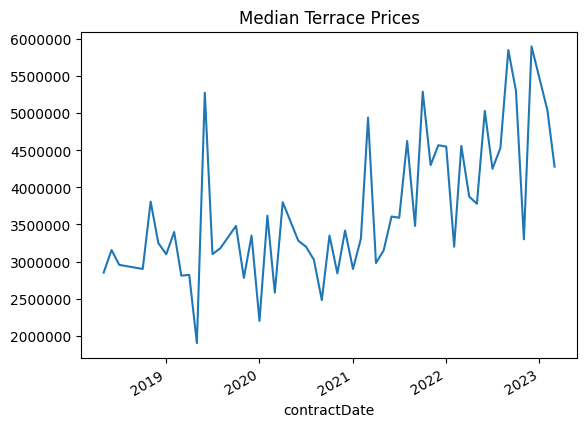

In [27]:
# Terrace
terrace = df[df['propertyType'] == 'Terrace']
terrace_grouped = terrace.groupby('contractDate')
terrace_averaged = terrace_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation
terrace_averaged.plot(title = 'Median Terrace Prices')

In [28]:
terrace_averaged

contractDate
2018-05-01    2850000.0
2018-06-01    3155000.0
2018-07-01    2955000.0
2018-10-01    2900000.0
2018-11-01    3808000.0
2018-12-01    3250000.0
2019-01-01    3098000.0
2019-02-01    3398500.0
2019-03-01    2810000.0
2019-04-01    2820000.0
2019-05-01    1900000.0
2019-06-01    5275000.0
2019-07-01    3100000.0
2019-08-01    3180000.0
2019-10-01    3480000.0
2019-11-01    2780000.0
2019-12-01    3350000.0
2020-01-01    2199000.0
2020-02-01    3618000.0
2020-03-01    2580000.0
2020-04-01    3800000.0
2020-06-01    3280000.0
2020-07-01    3200000.0
2020-08-01    3025000.0
2020-09-01    2480000.0
2020-10-01    3350000.0
2020-11-01    2840000.0
2020-12-01    3418000.0
2021-01-01    2900000.0
2021-02-01    3309000.0
2021-03-01    4940000.0
2021-04-01    2980000.0
2021-05-01    3150000.0
2021-06-01    3607500.0
2021-07-01    3590000.0
2021-08-01    4625000.0
2021-09-01    3480000.0
2021-10-01    5290000.0
2021-11-01    4300000.0
2021-12-01    4567890.0
2022-01-01    4550000.0
202

<Axes: title={'center': 'Median Semi-detached Prices'}, xlabel='contractDate'>

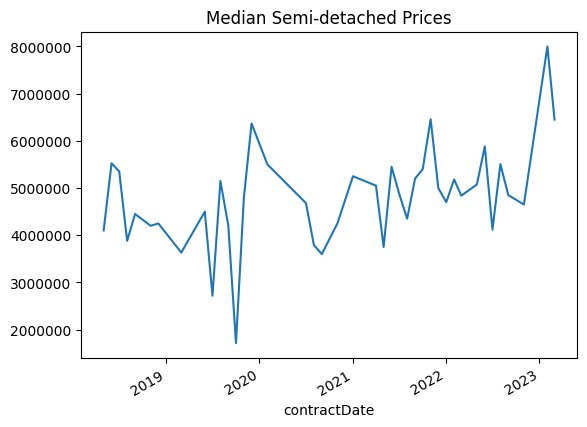

In [29]:
# Semi-detached 
semi_detached = df[df['propertyType'] == 'Semi-detached']
semi_detached_grouped = semi_detached.groupby('contractDate')
semi_detached_averaged = semi_detached_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation
semi_detached_averaged.plot(title = 'Median Semi-detached Prices')

In [30]:
semi_detached_averaged

contractDate
2018-05-01    4100000.0
2018-06-01    5525000.0
2018-07-01    5350000.0
2018-08-01    3880000.0
2018-09-01    4450000.0
2018-11-01    4200000.0
2018-12-01    4250000.0
2019-03-01    3632888.0
2019-06-01    4500000.0
2019-07-01    2718000.0
2019-08-01    5150000.0
2019-09-01    4200000.0
2019-10-01    1713900.0
2019-11-01    4800000.0
2019-12-01    6368000.0
2020-02-01    5500000.0
2020-07-01    4680000.0
2020-08-01    3790000.0
2020-09-01    3600000.0
2020-11-01    4250000.0
2021-01-01    5250000.0
2021-04-01    5050000.0
2021-05-01    3750000.0
2021-06-01    5450000.0
2021-07-01    4875000.0
2021-08-01    4350000.0
2021-09-01    5200000.0
2021-10-01    5400000.0
2021-11-01    6457000.0
2021-12-01    5000000.0
2022-01-01    4700000.0
2022-02-01    5180000.0
2022-03-01    4838000.0
2022-05-01    5075000.0
2022-06-01    5880000.0
2022-07-01    4120000.0
2022-08-01    5505000.0
2022-09-01    4850000.0
2022-11-01    4650000.0
2023-02-01    8000000.0
2023-03-01    6450000.0
Nam

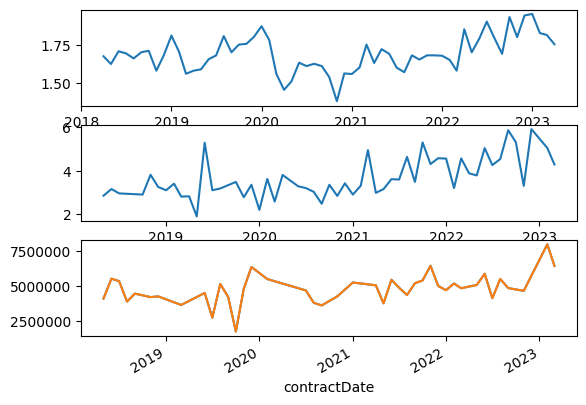

In [31]:

fig,ax = plt.subplots(3)

# Condominium
condominiums = df[df['propertyType'] == 'Condominium']
condominiums_grouped = condominiums.groupby('contractDate')
condominiums_averaged = condominiums_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation

# Terrace
terrace = df[df['propertyType'] == 'Terrace']
terrace_grouped = terrace.groupby('contractDate')
terrace_averaged = terrace_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation

# Semi-detached 
semi_detached = df[df['propertyType'] == 'Semi-detached']
semi_detached_grouped = semi_detached.groupby('contractDate')
semi_detached_averaged = semi_detached_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation
semi_detached_averaged.plot()


ax[0].plot(condominiums_averaged)
ax[0].xaxis.get_offset_text().set_visible(False)
ax[0].yaxis.get_offset_text().set_visible(False)
ax[1].plot(terrace_averaged)
ax[1].xaxis.get_offset_text().set_visible(False)
ax[1].yaxis.get_offset_text().set_visible(False)
ax[2].plot(semi_detached_averaged)
ax[2].xaxis.get_offset_text().set_visible(False)
ax[2].yaxis.get_offset_text().set_visible(False)


# I will change the axis figures later


### Does geographical location affect price? ###

Market Segment refers to the geographical region that the property falls in.

CCR - Core Central Region 
RCR - Rest of Central Region 
OCR - Outside Central Region

#### From the graph, it is easy to observe (and also relatively easy to conclude without data) that location is an important factor in housing prices. Median house prices in the Core Central region are the highest, while Median house prices outside the central region are the lowest.

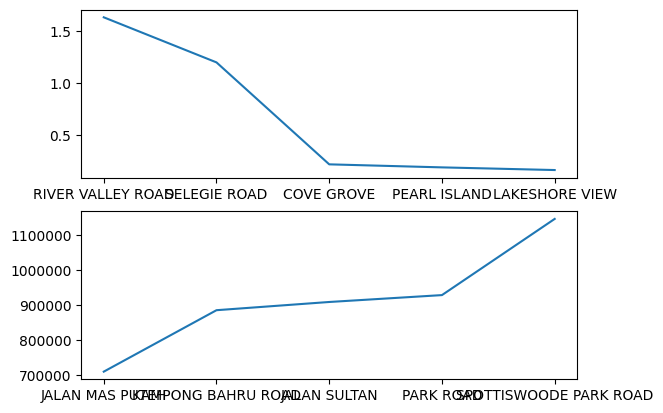

In [32]:
### WIP, there are some technical issues here since we are not sorting correctly)


# Grouping by street

fig,ax = plt.subplots(2)

street_grouped = df.groupby('street')
street_averaged = street_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation


street_averaged_desc = street_averaged.sort_values(ascending=False).head(5)

street_averaged_asc = street_averaged.sort_values().head(5)


ax[0].plot(street_averaged_desc)
ax[0].xaxis.get_offset_text().set_visible(False)
ax[0].yaxis.get_offset_text().set_visible(False)
ax[1].plot(street_averaged_asc)
ax[1].xaxis.get_offset_text().set_visible(False)
ax[1].yaxis.get_offset_text().set_visible(False)


# street_averaged.plot(kind='barh')
# plt.rc('xtick',labelsize=6)
# plt.xticks(rotation=40)


<Axes: title={'center': 'Median Property Prices of Condominiums in Core Central Region'}, xlabel='contractDate'>

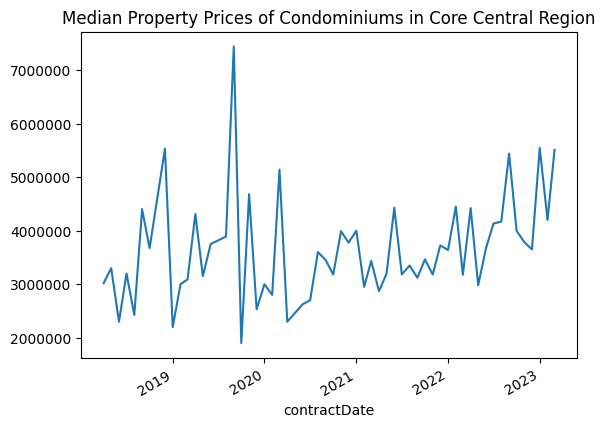

In [33]:
# CCR
ccr = df[df['marketSegment'] == 'CCR']
ccr_condo = ccr[ccr['propertyType'] == 'Condominium']
ccr_grouped = ccr_condo.groupby('contractDate')
ccr_averaged = ccr_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation
ccr_averaged.plot(title = 'Median Property Prices of Condominiums in Core Central Region')

In [34]:
ccr_averaged

contractDate
2018-04-01    3020000.0
2018-05-01    3300000.0
2018-06-01    2300000.0
2018-07-01    3200000.0
2018-08-01    2425000.0
2018-09-01    4400000.0
2018-10-01    3675000.0
2018-12-01    5530000.0
2019-01-01    2200000.0
2019-02-01    3000000.0
2019-03-01    3090000.0
2019-04-01    4310000.0
2019-05-01    3150000.0
2019-06-01    3750000.0
2019-08-01    3890000.0
2019-09-01    7440300.0
2019-10-01    1900000.0
2019-11-01    4680000.0
2019-12-01    2532000.0
2020-01-01    3000000.0
2020-02-01    2800000.0
2020-03-01    5140000.0
2020-04-01    2300000.0
2020-06-01    2625000.0
2020-07-01    2700000.0
2020-08-01    3600000.0
2020-09-01    3450000.0
2020-10-01    3180000.0
2020-11-01    3990000.0
2020-12-01    3775000.0
2021-01-01    4000000.0
2021-02-01    2950000.0
2021-03-01    3435000.0
2021-04-01    2870980.0
2021-05-01    3193030.0
2021-06-01    4428888.0
2021-07-01    3182620.0
2021-08-01    3350000.0
2021-09-01    3120750.0
2021-10-01    3464075.0
2021-11-01    3180000.0
202

<Axes: title={'center': 'Median Prices of Condominiums in Rest of Central Region'}, xlabel='contractDate'>

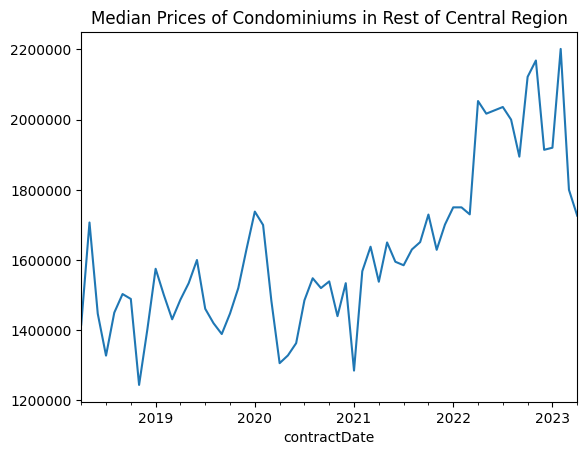

In [35]:
# RCR
rcr = df[df['marketSegment'] == 'RCR']
rcr_condo = rcr[rcr['propertyType'] == 'Condominium']
rcr_grouped = rcr.groupby('contractDate')
rcr_averaged = rcr_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation
rcr_averaged.plot(title = 'Median Prices of Condominiums in Rest of Central Region')

In [36]:
rcr_averaged

contractDate
2018-04-01    1416000.0
2018-05-01    1706900.0
2018-06-01    1447000.0
2018-07-01    1327500.0
2018-08-01    1450000.0
                ...    
2022-12-01    1914000.0
2023-01-01    1920000.0
2023-02-01    2201500.0
2023-03-01    1800000.0
2023-04-01    1726268.5
Name: price, Length: 61, dtype: float64

<Axes: title={'center': 'Median Prices of Condominiums Outside of Central Region'}, xlabel='contractDate'>

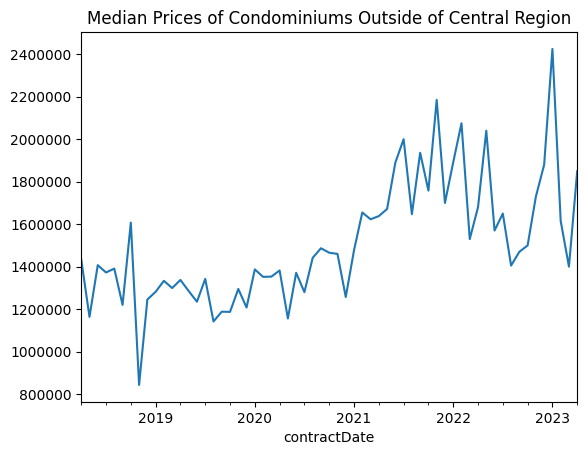

In [37]:
# OCR 
ocr = df[df['marketSegment'] == 'OCR']
ocr_condo = ocr[ocr['propertyType'] == 'Condominium']
ocr_grouped = ocr.groupby('contractDate')
ocr_averaged = ocr_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation
ocr_averaged.plot(title = 'Median Prices of Condominiums Outside of Central Region')


In [38]:
ocr_averaged

contractDate
2018-04-01    1434000.0
2018-05-01    1163500.0
2018-06-01    1407000.0
2018-07-01    1372550.0
2018-08-01    1390800.0
                ...    
2022-12-01    1880000.0
2023-01-01    2425000.0
2023-02-01    1615000.0
2023-03-01    1400000.0
2023-04-01    1850000.0
Name: price, Length: 61, dtype: float64

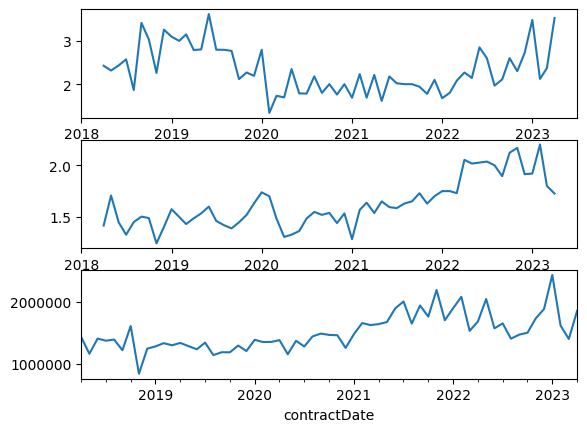

In [39]:
fig,ax = plt.subplots(3)

# CCR
ccr = df[df['marketSegment'] == 'CCR']
ccr_grouped = ccr.groupby('contractDate')
ccr_averaged = ccr_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation

# RCR
rcr = df[df['marketSegment'] == 'RCR']
rcr_grouped = rcr.groupby('contractDate')
rcr_averaged = rcr_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation

# OCR 
ocr = df[df['marketSegment'] == 'OCR']
ocr_grouped = ocr.groupby('contractDate')
ocr_averaged = ocr_grouped.price.median()
plt.ticklabel_format(style='plain') # preventing scientific notation
ocr_averaged.plot()


ax[0].plot(ccr_averaged)
ax[0].xaxis.get_offset_text().set_visible(False)
ax[0].yaxis.get_offset_text().set_visible(False)
ax[1].plot(rcr_averaged)
ax[1].xaxis.get_offset_text().set_visible(False)
ax[1].yaxis.get_offset_text().set_visible(False)
ax[2].plot(ocr_averaged)
ax[2].xaxis.get_offset_text().set_visible(False)
ax[2].yaxis.get_offset_text().set_visible(False)


# I will change the axis figures later

### Area vs Price ###

#### WIP please give me time :( ####

In [40]:
# df.plot(x='area',y='price',kind='bar')

### Floor Range vs Price ### 

#### The hypothesis is that this thing shouldn't really affect the price, but it could be possible that buildings with high floors are generally more expensive to own 

<Axes: xlabel='floorRange'>

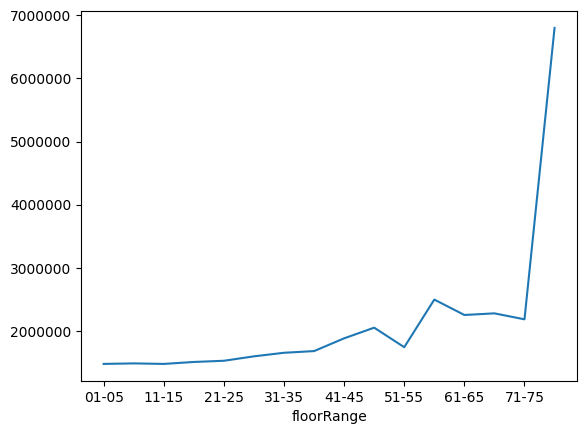

In [41]:
# Excluding buildings with no floor (we will presume they are big , which we will analyze later)

floors = df[df['floorRange'] != '-']

floors_grouped = floors.groupby('floorRange')

floors_averaged = floors_grouped.price.median()

plt.ticklabel_format(style='plain')

floors_averaged.plot()

# ... This result is honestly stupidly funny 


#### Tenure vs Price


### The simple hypothesis here is that generally people will pay more for longer leases (999 years) / freehold land against 99 years

In [42]:
print(df['tenure'].unique())

### Holy shit there is some really old data here, 999 years least commencing from 1885? wtf? 


tenure_99_2021 = df[df['tenure'] == '99 yrs lease commencing from 2021']
tenure_99_2021_condo = tenure_99_2021[tenure_99_2021['propertyType'] == 'Condominium']

tenure_999_1885= df[df['tenure'] == '999 yrs lease commencing from 1885']
tenure_999_1885_condo = tenure_999_1885[tenure_999_1885['propertyType'] == 'Condominium']

<StringArray>
[                          'Freehold',  '99 yrs lease commencing from 2007',
  '99 yrs lease commencing from 2016',  '99 yrs lease commencing from 1976',
  '99 yrs lease commencing from 2014',  '99 yrs lease commencing from 2006',
  '99 yrs lease commencing from 2005',  '99 yrs lease commencing from 2011',
  '99 yrs lease commencing from 2019',  '99 yrs lease commencing from 1996',
  '99 yrs lease commencing from 2008',  '99 yrs lease commencing from 2018',
 '956 yrs lease commencing from 1928',  '99 yrs lease commencing from 2002',
  '99 yrs lease commencing from 2012',  '99 yrs lease commencing from 1997',
  '99 yrs lease commencing from 2013',  '99 yrs lease commencing from 1993',
  '99 yrs lease commencing from 1994',  '99 yrs lease commencing from 1980',
 '999 yrs lease commencing from 1966',  '99 yrs lease commencing from 1995',
 '999 yrs lease commencing from 1827', '999 yrs lease commencing from 1885',
  '99 yrs lease commencing from 2015',  '99 yrs lease commenci

<Axes: title={'center': 'Median Prices of 99 Year Lease Condo beginning in 2021'}, xlabel='contractDate'>

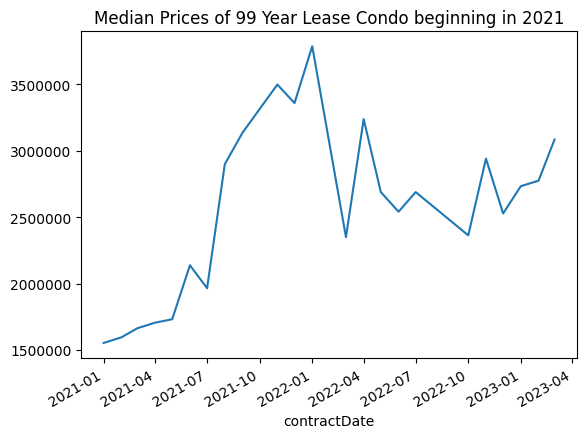

In [43]:
tenure_99_2021_condo

tenure_99_2021_condo

tenure_99_2021_condo_grouped = tenure_99_2021_condo.groupby('contractDate')
tenure_99_2021_averaged = tenure_99_2021_condo_grouped.price.median()

plt.ticklabel_format(style='plain')
tenure_99_2021_averaged.plot(title = 'Median Prices of 99 Year Lease Condo beginning in 2021')

<Axes: title={'center': 'Median Prices of 999 Year Lease Condo'}, xlabel='contractDate'>

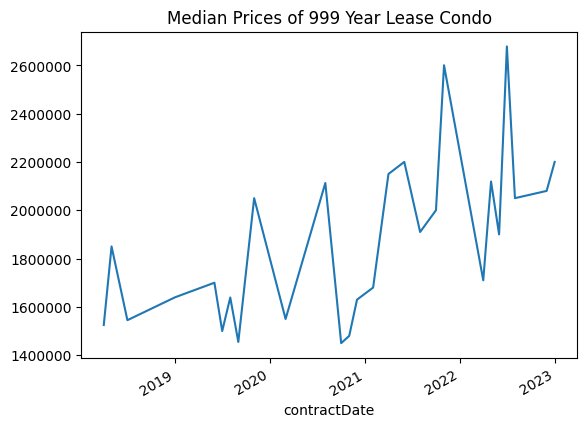

In [44]:
tenure_999_1885_condo

tenure_999_1885_grouped = tenure_999_1885_condo.groupby('contractDate')


tenure_999_1885_averaged = tenure_999_1885_grouped.price.median()

plt.ticklabel_format(style='plain')
tenure_999_1885_averaged.plot(title = 'Median Prices of 999 Year Lease Condo')

### Type of 

1 – New Sale -- we need to use nettprice and not price, as they are eligible for grants etc etc
2 – Sub Sale 
3 – Resale

In [45]:
tenure_999_1885_averaged

contractDate
2018-04-01    1525000.0
2018-05-01    1850000.0
2018-07-01    1545000.0
2019-01-01    1640000.0
2019-06-01    1700000.0
2019-07-01    1500000.0
2019-08-01    1638888.0
2019-09-01    1455000.0
2019-11-01    2050000.0
2020-03-01    1550000.0
2020-08-01    2112800.0
2020-10-01    1450000.0
2020-11-01    1480000.0
2020-12-01    1630000.0
2021-02-01    1680000.0
2021-04-01    2150000.0
2021-06-01    2200000.0
2021-08-01    1910000.0
2021-10-01    2000000.0
2021-11-01    2600000.0
2022-04-01    1710000.0
2022-05-01    2118850.0
2022-06-01    1900000.0
2022-07-01    2678000.0
2022-08-01    2050000.0
2022-12-01    2080000.0
2023-01-01    2200000.0
Name: price, dtype: float64

## Other things I am considering 

### Tenure (freehold or lease?), District (very similar to marketSegment to be honest), floorRange (would i pay more for a HDB flat that is high up? honestly yes, so i can always jump out the fucking window anytime lmao), typeOfSales (resale vs newsale)

## Data for Shaun

In [46]:
condo_df = df[df['propertyType'] == 'Condominium']



In [47]:
condo_df

,street,x,y,project,marketSegment,area,floorRange,noOfUnits,contractDate,typeOfSale,price,propertyType,district,typeOfArea,tenure,nettPrice
7,COVE DRIVE,28382.47067,25008.33592,TURQUOISE,CCR,226.0,01-05,1,2019-02-01,3,3450000,Condominium,4,Strata,99 yrs lease commencing from 2007,0
8,COVE DRIVE,28382.47067,25008.33592,TURQUOISE,CCR,194.0,01-05,1,2018-07-01,3,3100000,Condominium,4,Strata,99 yrs lease commencing from 2007,0
9,COVE DRIVE,28382.47067,25008.33592,TURQUOISE,CCR,194.0,01-05,1,2020-02-01,3,2800000,Condominium,4,Strata,99 yrs lease commencing from 2007,0
10,COVE DRIVE,28382.47067,25008.33592,TURQUOISE,CCR,348.0,06-10,1,2018-09-01,3,4400000,Condominium,4,Strata,99 yrs lease commencing from 2007,0
11,COVE DRIVE,28382.47067,25008.33592,TURQUOISE,CCR,194.0,01-05,1,2020-10-01,3,3180000,Condominium,4,Strata,99 yrs lease commencing from 2007,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR,85.0,31-35,1,2022-04-01,3,1988000,Condominium,3,Strata,99 yrs lease commencing from 2013,0
23656,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR,62.0,16-20,1,2022-04-01,3,1500000,Condominium,3,Strata,99 yrs lease commencing from 2013,0
23657,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR,47.0,21-25,1,2022-06-01,3,1150000,Condominium,3,Strata,99 yrs lease commencing from 2013,0
23658,KIM TIAN ROAD,27603.58585,29605.25187,HIGHLINE RESIDENCES,RCR,85.0,11-15,1,2022-04-01,3,1960000,Condominium,3,Strata,99 yrs lease commencing from 2013,0


In [48]:
condo_df['street'].unique()

<StringArray>
[             'COVE DRIVE',             'OCEAN DRIVE',
      'PASIR PANJANG ROAD',       'CENTRAL BOULEVARD',
        'MOUNT FABER ROAD',     'WEST COAST CRESCENT',
              'DOVER RISE',          'WEST COAST WAY',
            'ZEHNDER ROAD', 'PRINCE CHARLES CRESCENT',
          'YEW SIANG ROAD',      'PASIR PANJANG HILL',
        'JALAN MAT JAMBOL',        'MARINA BOULEVARD',
           'HAVELOCK ROAD',         'WEST COAST RISE',
             'DUNDEE ROAD',        'LOWER DELTA ROAD',
  'SOUTH BUONA VISTA ROAD',             'BALMEG HILL',
         'WEST COAST WALK',         'WEST COAST ROAD',
           'JALAN LEMPENG',     'COMMONWEALTH AVENUE',
                'COVE WAY',         'WEST COAST PARK',
            'JERVOIS LANE',              'PEPYS ROAD',
  'SPOTTISWOODE PARK ROAD',             'CLUB STREET',
          'ALEXANDRA VIEW',         'CHAY YAN STREET',
            'EVERTON ROAD',              'INDUS ROAD',
           'KIM TIAN ROAD',            'WISHART ROA

<Axes: title={'center': 'Price of a 127 Square Metere room in Monterey Park from 2019 - 2023'}, xlabel='contractDate'>

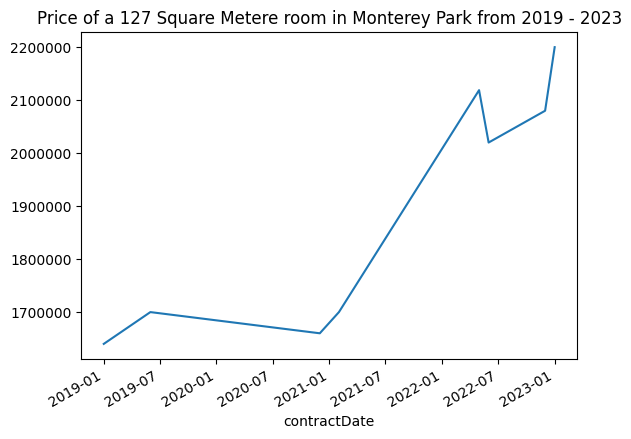

In [49]:
west_condos = condo_df[condo_df['street'] == 'WEST COAST RISE']

west_condos_127 = west_condos[west_condos['area'] == 127.0]

west_condos_127_grouped = west_condos_127.groupby('contractDate')
west_condos_127_averaged = west_condos_127_grouped.price.median()
plt.ticklabel_format(style='plain')

west_condos_127_averaged.plot(title = 'Price of a 127 Square Metere room in Monterey Park from 2019 - 2023')

In [50]:
west_condos_127



,street,x,y,project,marketSegment,area,floorRange,noOfUnits,contractDate,typeOfSale,price,propertyType,district,typeOfArea,tenure,nettPrice
2661,WEST COAST RISE,19132.42744,33241.94318,MONTEREY PARK CONDOMINIUM,OCR,127.0,01-05,1,2019-01-01,3,1640000,Condominium,5,Strata,999 yrs lease commencing from 1885,0
2665,WEST COAST RISE,19132.42744,33241.94318,MONTEREY PARK CONDOMINIUM,OCR,127.0,06-10,1,2019-06-01,3,1700000,Condominium,5,Strata,999 yrs lease commencing from 1885,0
2679,WEST COAST RISE,19132.42744,33241.94318,MONTEREY PARK CONDOMINIUM,OCR,127.0,06-10,1,2020-12-01,3,1660000,Condominium,5,Strata,999 yrs lease commencing from 1885,0
2682,WEST COAST RISE,19132.42744,33241.94318,MONTEREY PARK CONDOMINIUM,OCR,127.0,06-10,1,2021-02-01,3,1700000,Condominium,5,Strata,999 yrs lease commencing from 1885,0
2688,WEST COAST RISE,19132.42744,33241.94318,MONTEREY PARK CONDOMINIUM,OCR,127.0,01-05,1,2022-12-01,3,2080000,Condominium,5,Strata,999 yrs lease commencing from 1885,0
2690,WEST COAST RISE,19132.42744,33241.94318,MONTEREY PARK CONDOMINIUM,OCR,127.0,06-10,1,2022-05-01,3,2118850,Condominium,5,Strata,999 yrs lease commencing from 1885,0
2692,WEST COAST RISE,19132.42744,33241.94318,MONTEREY PARK CONDOMINIUM,OCR,127.0,06-10,1,2023-01-01,3,2200000,Condominium,5,Strata,999 yrs lease commencing from 1885,0
2693,WEST COAST RISE,19132.42744,33241.94318,MONTEREY PARK CONDOMINIUM,OCR,127.0,01-05,1,2022-06-01,3,2020000,Condominium,5,Strata,999 yrs lease commencing from 1885,0


<Axes: title={'center': 'Prices of houses in Monterey Park Condominium from 2018-2023'}, xlabel='contractDate'>

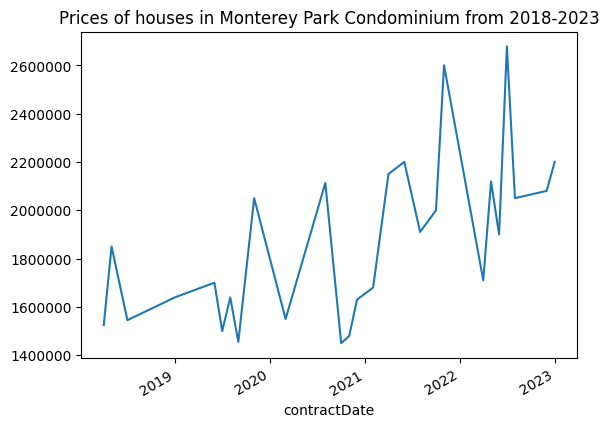

In [51]:
# Plot of price against time for the same condominium (Monterey Park)

west_date_grouped = west_condos.groupby('contractDate')

west_date_grouped_price = west_date_grouped.price.median()

plt.ticklabel_format(style='plain')
west_date_grouped_price.plot(title = 'Prices of houses in Monterey Park Condominium from 2018-2023')


# fig,ax = plt.subplots()

# ax.plot(west_date_grouped_price, "-b", label="Prices")                  # the y values
# ax.plot(grads, "--r", label="gradients")    # the computed gradients
# plt.legend()
# plt.show()

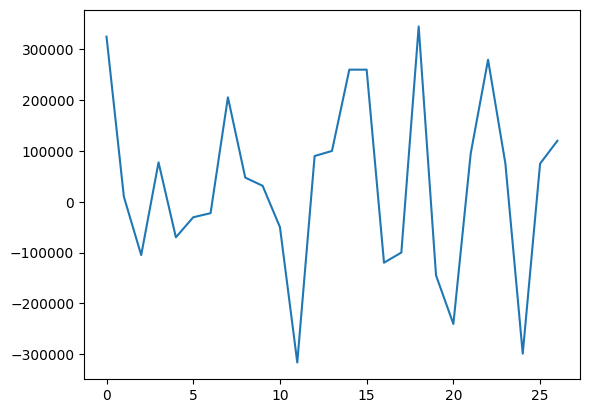

In [52]:
fig, ax = plt.subplots()

grads = np.gradient(west_date_grouped_price)

ax.plot(grads)

plt.show()

In [53]:
len(west_date_grouped_price)

27

In [54]:
len(np.gradient(west_date_grouped_price))

27